# Health Analysis for January 2021

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
colors = ['#a52626','#2663a5']
sns.set_palette(sns.color_palette(colors))

In [3]:
onedrop = pd.read_csv('./data/onedrop_2021-01.csv')

In [4]:
onedrop.head()

,MomentType,Measurement,Unit,Timestamp,MedName,Type,Note,Tags,Location,TimeZone,ExcelTimestamp
0,Blood Glucose,96.0,mg/dL,2021-01-31 18:10:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1612145400000
1,Blood Glucose,114.0,mg/dL,2021-01-31 11:28:58.0,NaN,NaN,NaN,NaN,NaN,NaN,1612121338000
2,Blood Glucose,134.0,mg/dL,2021-01-30 17:54:31.0,NaN,NaN,NaN,NaN,NaN,NaN,1612058071000
3,Blood Glucose,89.0,mg/dL,2021-01-30 13:18:09.0,NaN,NaN,NaN,NaN,NaN,NaN,1612041489000
4,Blood Glucose,102.0,mg/dL,2021-01-29 18:10:20.0,NaN,NaN,NaN,NaN,NaN,NaN,1611972620000


In [5]:
onedrop['MomentType'].value_counts()

Medication       93
Blood Glucose    82
Food              1
Name: MomentType, dtype: int64

## Blood Glucose

In [6]:
glucose = onedrop[onedrop['MomentType'] == 'Blood Glucose'].copy()
glucose = glucose.rename({'Measurement':'Glucose'}, axis=1)

In [7]:
glucose.head()

,MomentType,Glucose,Unit,Timestamp,MedName,Type,Note,Tags,Location,TimeZone,ExcelTimestamp
0,Blood Glucose,96.0,mg/dL,2021-01-31 18:10:00.0,NaN,NaN,NaN,NaN,NaN,NaN,1612145400000
1,Blood Glucose,114.0,mg/dL,2021-01-31 11:28:58.0,NaN,NaN,NaN,NaN,NaN,NaN,1612121338000
2,Blood Glucose,134.0,mg/dL,2021-01-30 17:54:31.0,NaN,NaN,NaN,NaN,NaN,NaN,1612058071000
3,Blood Glucose,89.0,mg/dL,2021-01-30 13:18:09.0,NaN,NaN,NaN,NaN,NaN,NaN,1612041489000
4,Blood Glucose,102.0,mg/dL,2021-01-29 18:10:20.0,NaN,NaN,NaN,NaN,NaN,NaN,1611972620000


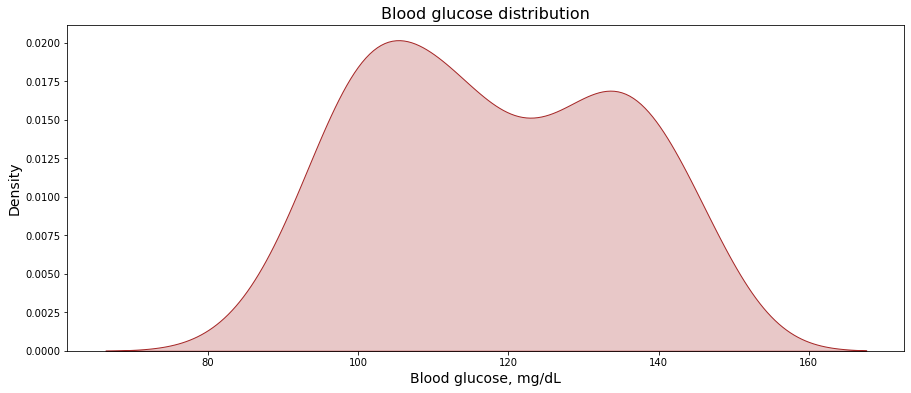

In [8]:
plt.figure(figsize=(15,6))
sns.kdeplot(glucose['Glucose'], shade=True)
plt.xlabel('Blood glucose, mg/dL', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Blood glucose distribution', fontsize=16)
plt.show()

In [9]:
glucose_ts = glucose[['Glucose','Timestamp']].copy()
glucose_ts['Timestamp'] = pd.to_datetime(glucose_ts['Timestamp'])
glucose_ts = glucose_ts.set_index('Timestamp')
glucose_ts.head()

,Glucose
Timestamp,
2021-01-31 18:10:00,96.0
2021-01-31 11:28:58,114.0
2021-01-30 17:54:31,134.0
2021-01-30 13:18:09,89.0
2021-01-29 18:10:20,102.0


In [10]:
glucose_daily_avg = glucose_ts['Glucose'].resample('D').mean()

/home/jonathan/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


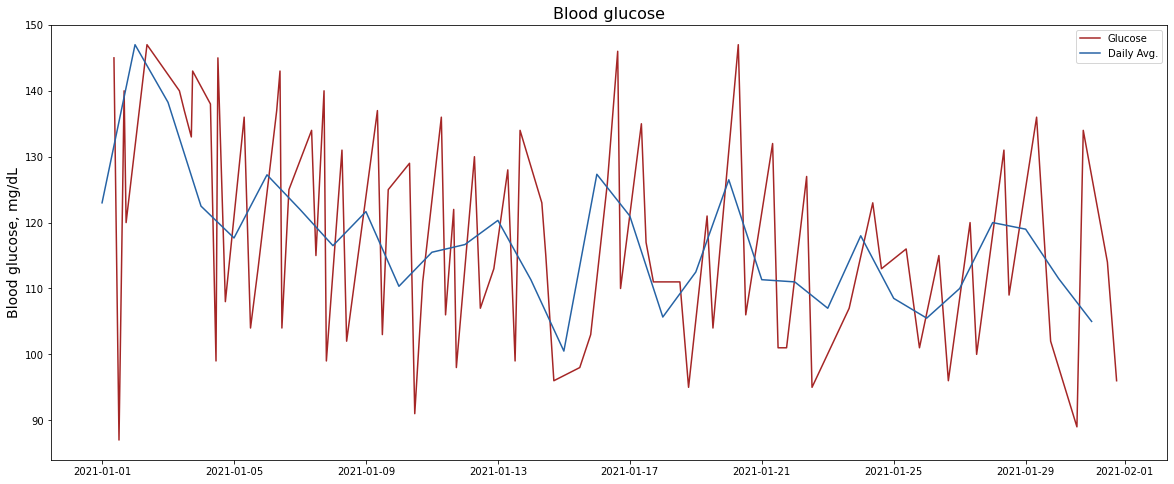

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=glucose_ts, ax=ax)
sns.lineplot(x=glucose_daily_avg.index, y=glucose_daily_avg, ax=ax, label='Daily Avg.')
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('Blood glucose, mg/dL', fontsize=14)
ax.set_title('Blood glucose', fontsize=16)
plt.show()